In [7]:
import torch
import transformers
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast
from fastai.text.all import *
import re
import fastai

print(torch.__version__)

print(transformers.__version__)
print( fastai.__version__)


1.8.0
4.20.1
2.7.7


In [9]:
# KoGPT2_TEST
from transformers import PreTrainedTokenizerFast
import torch
from transformers import GPT2LMHeadModel

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>')
tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o")
['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '▁입', '니다.', '😤', ':)', 'l^o']

model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')
text = '감동적인 이야기'
input_ids = tokenizer.encode(text, return_tensors='pt')
gen_ids = model.generate(input_ids,
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True)
generated = tokenizer.decode(gen_ids[0])
print(generated)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


감동적인 이야기들이 많이 나오는데요.
이런 것들이 좀 더 많은 분들에게 전달될 수 있도록 노력하겠습니다.
네. 오늘 말씀 감사합니다.
예. 고맙습니다.</d> 이십일 세기 한국 현대미술을 대표하는 작가 백남준 씨가 십구세기를 풍미한 거장들의 작품을 모아놓은 전시회를 열었죠.
백 씨의 작품 세계를 조명해보는 시간입니다.
김지선 기자가 소개했으니까 네~ 먼저 그 이천팔년부터 천 년까지 우리 미술계를 이끌어온 원로작가들을 만나보겠다.
아니면 지금 현재로 치자면은 뭐 한 시대를 이끌었던 거는 누구냐? 아하 예 그런


In [10]:
with open('./data/reviews.txt', encoding='utf-8') as f:
    lines = f.read()
lines=" ".join(lines.split())
len(lines)
lines = lines.replace('\n|\t', ' ')
hangul = re.compile('[^ ㄱ-ㅣ가-힣+]')
len(lines)
result = hangul.sub('',lines)
result

# UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 20: illegal multibyte sequence
# 해당 에러 ->  encoding='utf-8' 넣어 주기

'  오건영 저자님의 부의 시나리오 두번째 이야기같은 느낌도 있었고 부의 시나리오 심화편 같은 생각도 들었다 이전에 오건영 저자님께서 나왔던 영상들을 자주 접해서 그런지 책의 구어체에서 저자님의 목소리가 들리는듯 하였고 이전 책처럼 독자분들에게 조금이라도 더 쉽게 설명하시려고 노력하셨다는게 책 전반적인 부분에서 느껴졌다경제 서적 이라고 하면 그림 하나 없을 것 같고 글의 내용도 딱딱할 것만 같고 딱딱하다 못해 문장 문장에서 뾰족뾰족한 느낌이 들 것만 같은 편견이 있었는데 그런 편견을 깨준 책이고 독자분들에게 배려심이 엄청 깊다는 느낌을 받은 책이다 요즘 뉴스와 신문을 보면 기준금리 인상이며 연준이 어떻다고 하더라 인플레이션이 어떻다더라 하는 소식들을 매일 매일 접하고 있다 이런 소식들은 좀 더 이해하기 쉽게 받아들이도록 많은 도움을 줄수 있는 책이라고 생각한다   인플레이션에서 살아남기저 오건영출판사  출판일 년 월일역사상 유래가 없는 양적완화 나아가서는 질적완화까지 단행되면서 시장에는 유동성이 과다하게 공급되었다 년 금융위기에 이어 코로나 사태로 인한 경기침체를 막고자 이러한 정책이 실시된 것이다 그에 따라서 부동산과 주식과 같은 자산가치는 급상승하였고 연준 및 각국 중앙은행은 낮은 금리를 유지했다 채권투자도 좋았고 자산투자도 좋았다 세계는 마치 잃어버린 년의 일본을 보면서 디플레이션에 빠지지 않기 위해서 총력전을 기울인 것 같았다이 책의 저자처럼 년대의 안일한 인플레이션 대응에 이은 폴 포커의 긴축정책까지 과거로 거슬러 올라갔다 최근에 있어서 인플레이션은 조짐은 있었지만 심각한 위협의 수준까지는 되지 못했다 연준에서 경기과열을 우려해서 금리를 인상하려는 움직임을 보이면 눈 녹듯이 인플레이션은 자취를 감췄다 코로나 사태를 극복하기 위해서 트럼프 및 바이든 행정부는 엄청나 규모의 경기부양책 지원책을 펼쳤다 그러나 근 여년간 심각한 인플레이션 조짐이 없었기 때문에 연준의 대응은 다소 안일한 측면이 있었다는 것이다최근의 공급망 문제로 인한 인플레이션의 유발요인도 

In [11]:
#model input output tokenizer
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x):
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

#split data
train=lines[:int(len(lines)*0.9)]
test=lines[int(len(lines)*0.9):]
splits = [[0],[1]]

#init dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch,seq_len = 8,256
dls = tls.dataloaders(bs=4, seq_len=seq_len)
# dls.show_batch(max_n=2)

SuggestedLRs(valley=7.585775892948732e-05)


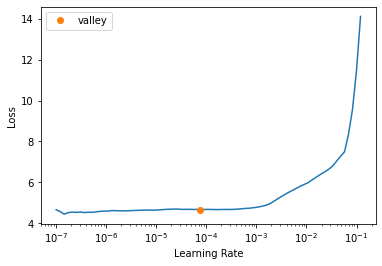

In [12]:
#gpt2 ouput is tuple, we need just one val
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]


learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
lr=learn.lr_find()
print(lr)
learn.fit_one_cycle(5, lr)
# learn.fine_tune(3)

In [13]:
prompt='감동적인 이야기'
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,
                           use_cache=True
                          )
tokenizer.decode(preds[0].cpu().numpy())

'감동적인 이야기들이 가득하다.이 책은 저자가 경험한 다양한 에피소드와 함께 그 속에서 우리가 얻을 수 있는 교훈들을 알려준다.저자는 이 책에서 우리에게 필요한 것들을 하나씩 소개한다.첫째, 내가 좋아하는 것을 하나둘 발견하는 것이다. 둘째, 나를 사랑하는 것, 셋째, 다른 사람의 관심을 끌 만한 무언가를 찾는 것이 중요하다는 점이다.다섯째. 나 자신을 사랑할 줄 아는 것. 넷째, 남을 돕는 것만으로도 충분하다고 생각하는 것입니다.6장.""당신이 당신이라면 무엇이든 해낼 거야!"라고 말할 때 가장 먼저 떠오르는 생각은 \'내가 하는 말 중에 제일 잘 듣는 말이 뭐가 있겠어?\'였다.바로 이런 생각이었다. " (p'